In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.interpolate as spi

from sklearn.isotonic import IsotonicRegression

In [2]:
D = 3
N = 1e8
true_nlist = [1.5, 3, 6, 12, 24]
m = 2/3
nlist = [round(tnn/(1-m)-1, 4) for tnn in true_nlist]
s = 1.0
sclist = [0.1, 0.5, 1.0]
L = 1.0
num_empty = 0
res_dir = 'nsc-setisaturday-numempty200'
randix = 0

In [17]:
plot_data = {}
for scix, sc in enumerate(sclist):
    c = s / sc
    for nix, n in enumerate(nlist):
        true_n = true_nlist[nix]
        fout = (
            f"{res_dir}/D={D}_n={float(n)}_N={N:.2e}_"
            f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
        )
        res = pd.read_csv(fout+'.csv')
        res_years = pd.read_csv(fout+'_years.csv')

        tau = res_years.OriginTime.median() # median origin proper-time
        proper_volume_now = np.power(13.8*s/c*tau,3)
        galaxy_density_now = 2e+6;
        num_galaxies_now = galaxy_density_now * proper_volume_now # G
        G = num_galaxies_now
        C = res.shape[0] # num civs
        galaxies_per_civ = num_galaxies_now  / C

        res_years['pctile'] = (np.arange(0, C)+1.0) / C
        galaxies_per_civ_at_pctile = G/(res_years['pctile']*C)*res.PctEmpty
        plot_data[(true_n, sc)] = (res_years['pctile'], galaxies_per_civ_at_pctile)

/Users/calvinm/miniconda3/envs/nbodykit-env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/calvinm/miniconda3/envs/nbodykit-env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/calvinm/miniconda3/envs/nbodykit-env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/calvinm/miniconda3/envs/nbodykit-env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/calvinm/miniconda3/envs/nbodykit-env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)

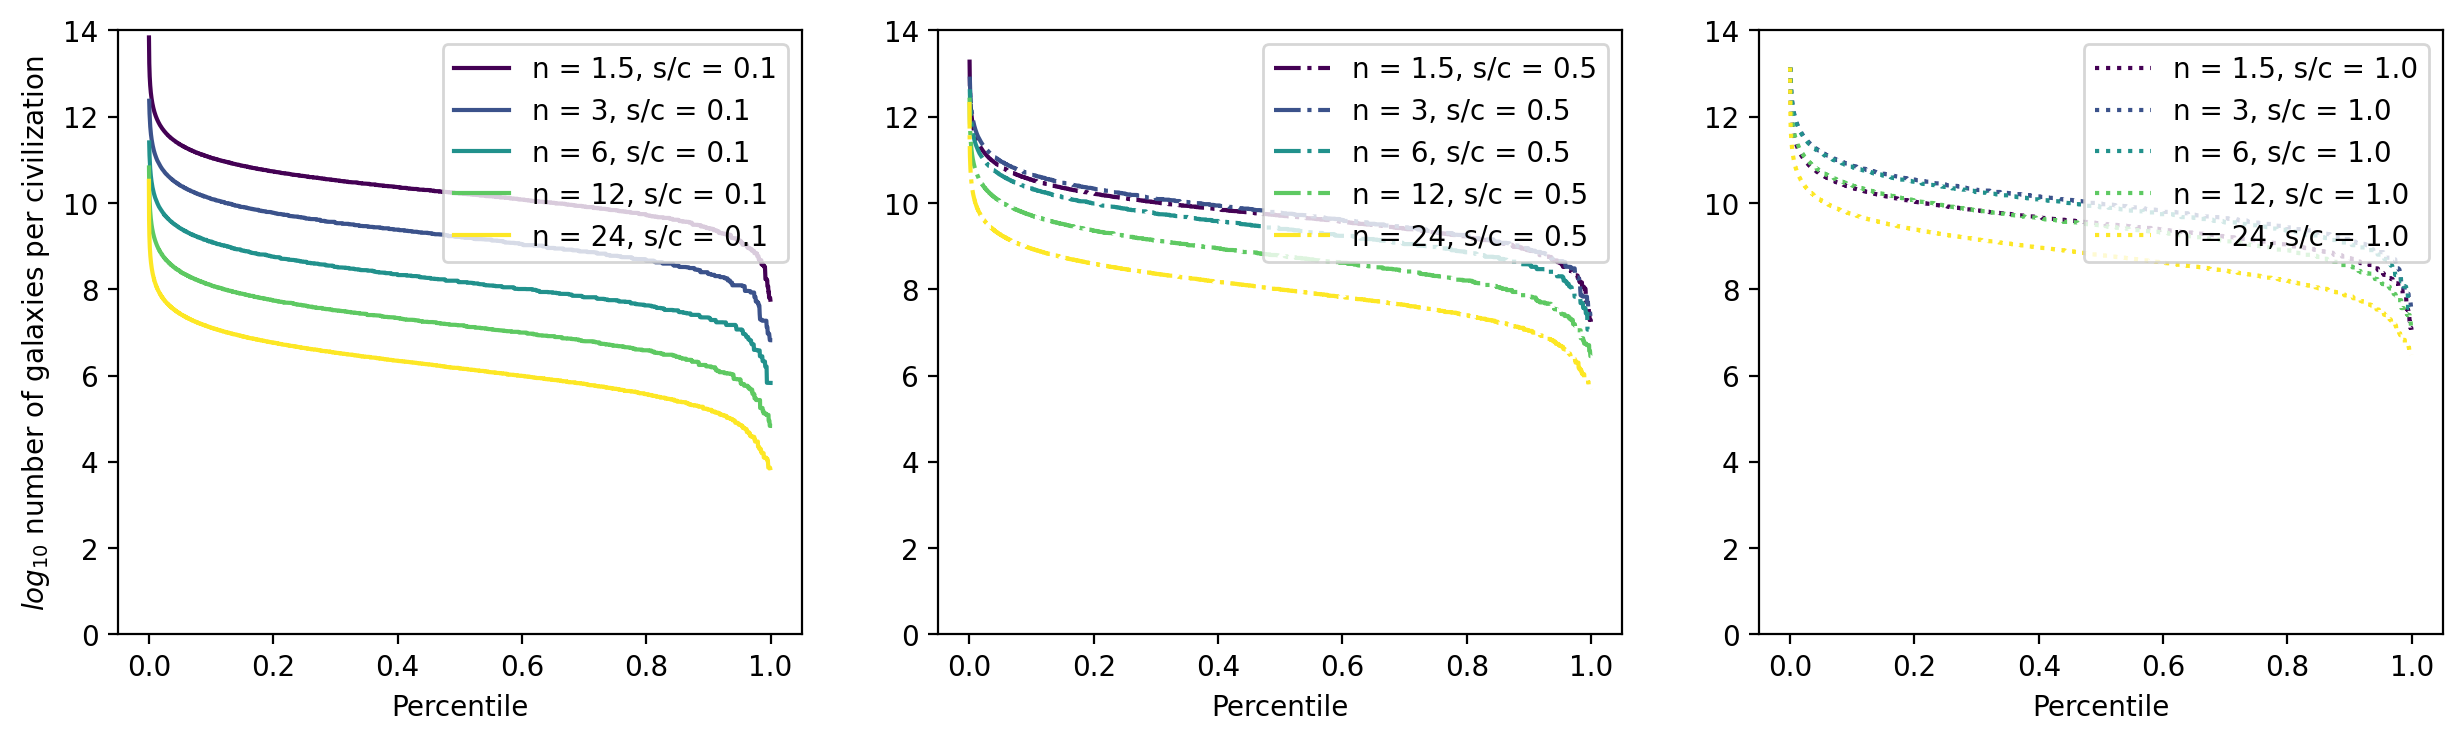

In [22]:
cmap = plt.get_cmap('viridis')
mycols = cmap(np.linspace(0, 1, len(nlist)))
scstyles = ['-', '-.', ':']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4), dpi=200)
for scix, sc in enumerate(sclist):
    leg = []
    for nix, true_n in enumerate(true_nlist):
        (pctiles, galaxies_per_civ) = plot_data[(true_n, sc)]
        log10gperc = np.log10(galaxies_per_civ)
        irer = IsotonicRegression(out_of_bounds='nan', increasing=False)
        smoothed_log10gperc = irer.fit_transform(pctiles[np.isfinite(log10gperc)], log10gperc[np.isfinite(log10gperc)])
        axes[scix].plot(
            pctiles[np.isfinite(log10gperc)], 
            smoothed_log10gperc, 
            scstyles[scix], color=mycols[nix])
        leg.append(f"n = {true_n}, s/c = {sc:.2}");
        axes[scix].set_xlabel('Percentile')
        axes[scix].set_ylim(0, 14);
    axes[scix].legend(leg, loc = 'upper right');#, bbox_to_anchor = (1.0, 0.5));
axes[0].set_ylabel('$log_{10}$ number of galaxies per civilization');
plt.savefig('figures-friday/galaxies-1.png');

/Users/calvinm/miniconda3/envs/nbodykit-env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/calvinm/miniconda3/envs/nbodykit-env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/calvinm/miniconda3/envs/nbodykit-env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/calvinm/miniconda3/envs/nbodykit-env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/calvinm/miniconda3/envs/nbodykit-env/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)

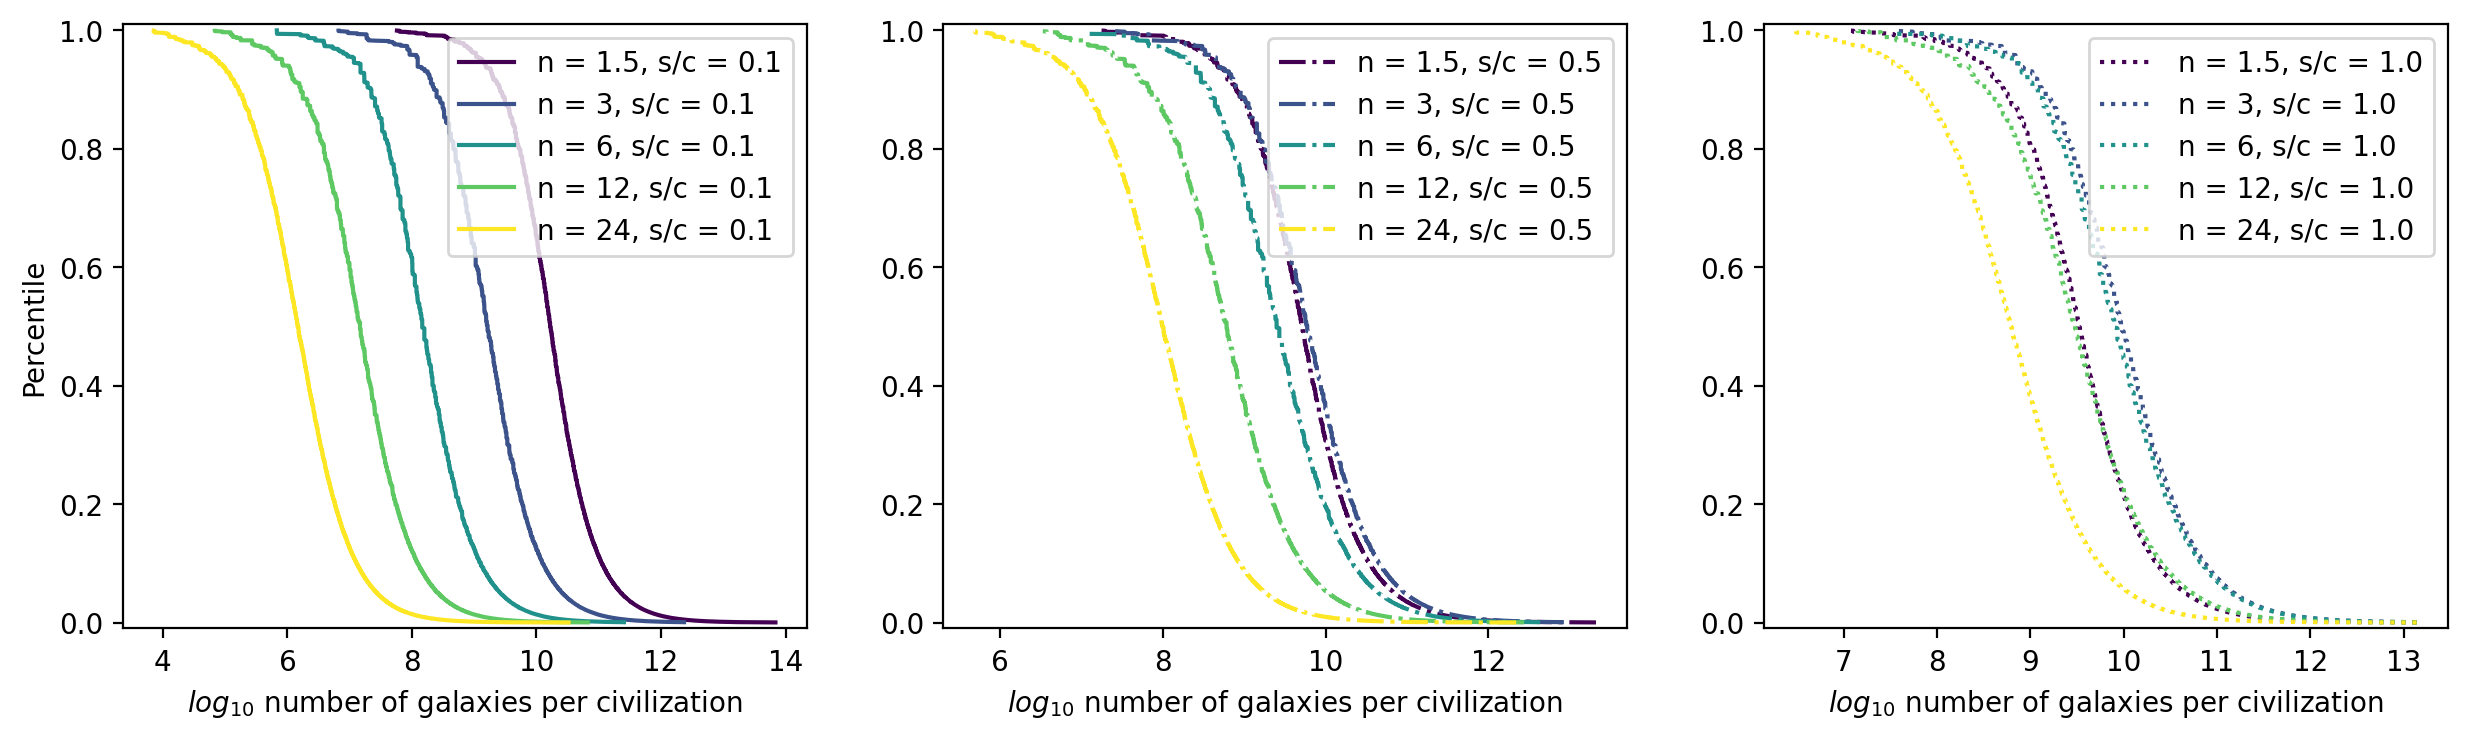

In [24]:
cmap = plt.get_cmap('viridis')
mycols = cmap(np.linspace(0, 1, len(nlist)))
scstyles = ['-', '-.', ':']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4), dpi=200)
for scix, sc in enumerate(sclist):
    leg = []
    for nix, true_n in enumerate(true_nlist):
        (pctiles, galaxies_per_civ) = plot_data[(true_n, sc)]
        log10gperc = np.log10(galaxies_per_civ)
        irer = IsotonicRegression(out_of_bounds='nan', increasing=False)
        smoothed_log10gperc = irer.fit_transform(pctiles[np.isfinite(log10gperc)], log10gperc[np.isfinite(log10gperc)])
        axes[scix].plot(
            smoothed_log10gperc, 
            pctiles[np.isfinite(log10gperc)], 
            scstyles[scix], color=mycols[nix])
        leg.append(f"n = {true_n}, s/c = {sc:.2}");
        
        axes[scix].set_ylim(-0.01, 1.01);
    axes[scix].legend(leg, loc = 'upper right');#, bbox_to_anchor = (1.0, 0.5));
    axes[scix].set_xlabel('$log_{10}$ number of galaxies per civilization');
axes[0].set_ylabel('Percentile')
plt.savefig('figures-friday/galaxies-2.png');

In [6]:
smoothed_log10gperc[0:20]

array([6.30103472, 6.00000472, 5.82391346, 5.69897472, 5.60206471,
       5.52288347, 5.45593668, 5.39794473, 5.34679221, 5.30103472,
       5.25964203, 5.22185347, 5.18709136, 5.15490668, 5.12494346,
       5.09691473, 5.07058579, 5.04576221, 5.02228112, 5.00000472])

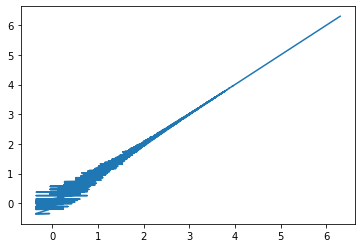

In [7]:
plt.plot(log10gperc[np.isfinite(log10gperc)], smoothed_log10gperc)

In [8]:
pctiles[np.isfinite(log10gperc)]

0        0.000044
1        0.000087
2        0.000131
3        0.000175
4        0.000218
           ...   
22886    0.998735
22887    0.998778
22889    0.998865
22897    0.999215
22901    0.999389
Name: pctile, Length: 22787, dtype: float64

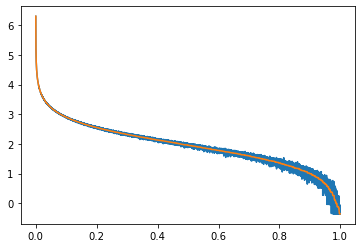

In [9]:
plt.plot(pctiles[np.isfinite(log10gperc)], log10gperc[np.isfinite(log10gperc)])
plt.plot(pctiles[np.isfinite(log10gperc)], irer.fit_transform(pctiles[np.isfinite(log10gperc)], log10gperc[np.isfinite(log10gperc)],))

In [10]:
pctiles[np.isfinite(log10gperc)]

0        0.000044
1        0.000087
2        0.000131
3        0.000175
4        0.000218
           ...   
22886    0.998735
22887    0.998778
22889    0.998865
22897    0.999215
22901    0.999389
Name: pctile, Length: 22787, dtype: float64

In [11]:
np.linspace(0, 1, 3)

array([0. , 0.5, 1. ])

In [12]:
(np.arange(0, 3)+1) / 3

array([0.33333333, 0.66666667, 1.        ])